## Assignment 1 - Regression (Normal Equation)

### Parth Bansal

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression

### Part A: Data Cleaning & Exploratory Analysis

#### (1) Import full data set using Pandas, and verify that the shape is: (864863, 74)

In [2]:
df = pd.read_csv('/Users/parthbansal/Downloads/bottle.csv')
df.head()

/var/folders/0y/n_xgd2n97837m629ymdq84rr0000gn/T/ipykernel_17160/2279483484.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/parthbansal/Downloads/bottle.csv')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(864863, 74)

#### (2) Limit the dataset to the following columns: [T_degC, Salnty, STheta] and then remove all NaN and NA values 
(Hint: Pandas has a method for this), and Verify the shape is: (812174, 3)

In [4]:
df = df[['T_degC', 'Salnty', 'STheta']] 

In [5]:
df = df.dropna()

In [6]:
df.shape

(812174, 3)

#### (3) Build the following plots using matplotlib: (a) Scatter: Salnty (salinity of water) vs T_degC, (b) Scatter: STheta (density of water) vs T_degC3) 

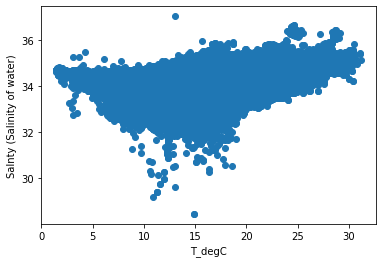

In [7]:
plt.scatter(df['T_degC'], df['Salnty'])
plt.xlabel('T_degC')
plt.ylabel('Salnty (Salinity of water)')
plt.show()

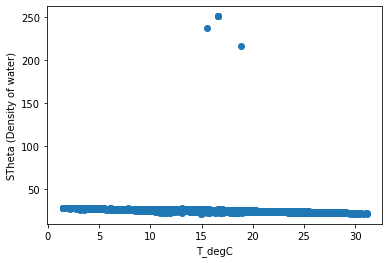

In [8]:
plt.scatter(df['T_degC'], df['STheta'])
plt.xlabel('T_degC')
plt.ylabel('STheta (Density of water)')
plt.show()

#### (4) Build the following plot using seaborn: (a) Distribution of T_degC
(hint: distplot will be helpful here)

/Users/parthbansal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


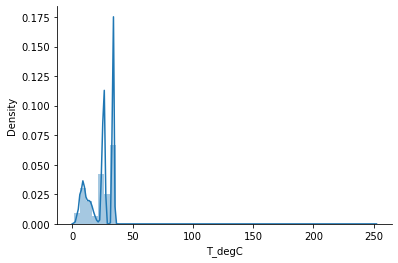

In [9]:
sns.distplot(df, kde=True)
sns.despine()
plt.xlabel('T_degC')
plt.show()

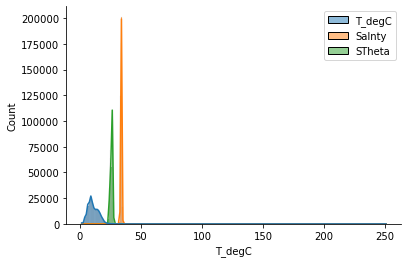

In [10]:
sns.histplot(df, kde=True)
sns.despine()
plt.xlabel('T_degC')
plt.show()

#### (5) Remove obvious outliers from step 3b: Shape for clean data will be: (812168, 3)
(Hint: Just looking to remove extreme STheta values - please post on Canvas if struggling with this section.)

In [11]:
df.shape

(812174, 3)

In [12]:
df['STheta'].describe()

count    812174.000000
mean         25.819394
std           1.167787
min          20.934000
25%          24.965000
50%          25.996000
75%          26.646000
max         250.784000
Name: STheta, dtype: float64

In [13]:
df = df[df['STheta'] <= 30]
df.shape

(812168, 3)

#### (6) Plot 3b again – does it look better? Explain!

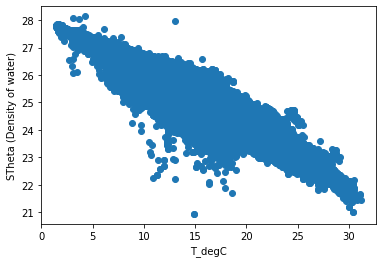

In [14]:
plt.scatter(df['T_degC'], df['STheta'])
plt.xlabel('T_degC')
plt.ylabel('STheta (Density of water)')
plt.show()

The plot definitely looks better. Excluding the data points with STheta values above 30 has improved the plot's suitability for analysis by removing extreme outliers.

### Part B: Train & Test Split

In [15]:
X = df[['Salnty', 'STheta']]
y = df['T_degC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Part C: Linear Regression Using Normal Equation - Coded In Python

#### (1) Build the normal equation using numpy & fit using your training data (X_train & y_train)

In [16]:
X_train = np.column_stack((np.ones(len(X_train)), X_train))

In [17]:
X_train

array([[ 1.    , 33.5593, 24.7422],
       [ 1.    , 33.485 , 24.089 ],
       [ 1.    , 33.453 , 25.586 ],
       ...,
       [ 1.    , 34.22  , 26.347 ],
       [ 1.    , 34.044 , 26.409 ],
       [ 1.    , 33.47  , 24.458 ]])

In [18]:
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

#### (2) Print out the coefficients - we will need to compare these to the output in Part D

In [19]:
print("Coefficients:", theta)

Coefficients: [35.64451188  3.11151204 -5.03907257]


#### (3) Predict T_degC for the test data using the fitted values in b

In [20]:
X_test = np.column_stack((np.ones(len(X_test)), X_test))
y_pred = X_test @ theta

In [21]:
y_pred

array([ 7.88437556,  7.14969722,  5.22668207, ...,  7.14752462,
       16.11974133, 15.64019849])

#### (4) Calculate the following for the test data: mean squared error, r-squared, explained variance

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared:", r2)
print("Explained Variance Score:", evs)

Mean Squared Error: 0.2337830143180255
R-Squared: 0.9868919565634323
Explained Variance Score: 0.9868919614560818


#### (5) Create a scatterplot that shows actual versus predicted values for the T_degC

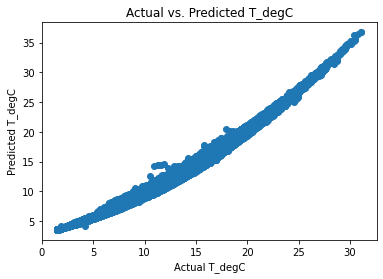

In [23]:
plt.scatter(y_test, y_pred)
plt.title("Actual vs. Predicted T_degC")
plt.xlabel("Actual T_degC")
plt.ylabel("Predicted T_degC")
plt.show()

### Part D: Using sklearn API

#### (1) Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train & y_train.

In [24]:
lin_reg = LinearRegression()

In [25]:
lin_reg.fit(X_train, y_train)

LinearRegression()

#### (2) Print out the coefficients (including the intercept)

In [26]:
print("Coefficients:", lin_reg.coef_)

Coefficients: [ 0.          3.11151204 -5.03907257]


In [27]:
print("Intercept:", lin_reg.intercept_)

Intercept: 35.644511878050054


#### (3) Predict T_degC for the test data using the fitted values in b.

In [28]:
y_pred_sklearn = lin_reg.predict(X_test)

#### (4) Calculate the following for the test data: mean squared error, r-squared, explained variance

In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared:", r2)
print("Explained Variance Score:", evs)

Mean Squared Error: 0.2337830143180255
R-Squared: 0.9868919565634323
Explained Variance Score: 0.9868919614560818


#### (5) Create a scatterplot that shows actual versus predicted values for the T_degC.

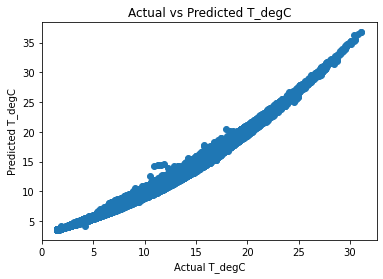

In [30]:
plt.scatter(y_test, y_pred_sklearn)
plt.xlabel('Actual T_degC')
plt.ylabel('Predicted T_degC')
plt.title('Actual vs Predicted T_degC')
plt.show()

### Part E: Conceptual Questions

**Why is it important to have a test set?**
To evaluate our model and ensure it can generalize (no overfitting/underfitting) on unseen data.


**If the normal equation always provides a solution, when would we not want to use it?**
It can be very expensive computationally to compute the inverse of large matrix (very large dataset).


**How might we improve the fit of our models from Part C & D?**
We can try different regression models (ex. ridge) or we can add more features. 


**As we move further into Machine Learning, we will need to continually consider the bias-variance tradeoff. Explain what bias is and what variance is in regards to the bias-variance tradeoff.**
Bias refers to a model that is very simple (underfitting) and doesn't compute the patterns in teh data. Variance is when the the model is too complex (overftting). To create a good predictive model, it is important to strike a balance between bias and variance. One wants to avoid underfitting and overfitting, and find a model that can accurately predict outcomes on unseen data (generalize).



**In a linear regression model, how might we reduce bias?**
We can add more features to our data to develop more intrinsic relationships among the features, and make the model more complex. 


**In a linear regression model, how might we reduce variance?** 
We can use cross-validation techniques to find the values that produce the best performance on the test set. We can also use regularization techniques. 